#                                                 Optimization 
#                               Project 1 – Linear Programming 

### Group 10 Members:
### Olivia Lee
### Jiaxi Wang
### Varun Kausika
### Kshitij Mahajan

## Import modules and load the required datasets

In [82]:
# Import required libraries and packages
import pandas as pd
import numpy as np
import gurobipy as gp
from matplotlib import pyplot as plt
%matplotlib inline

In [83]:
# Import the given CSV files 
ROI_data = pd.read_csv("https://raw.githubusercontent.com/KshitijMahajan1998/Optimization/main/ROI_data.csv")
# Added index_col=0 to make month name as the index of dataframe
roi_mat = pd.read_csv("https://raw.githubusercontent.com/KshitijMahajan1998/Optimization/main/roi_mat.csv",index_col=0)
ROI_data


,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [84]:
roi_mat

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


## Question 3

Formulate the marketing budget allocation problem as a linear program.  Use gurobi to find the 
optimal budget allocation. 

In [85]:
#Construct a dictionary of marketing means having values from 0-9 so that we can use these variables 
#for constructing the contraint matrix without needing to hard code numbers.

#Take the column values except platform
mediums= list(ROI_data.columns)[1:] 
medium_dict={}
i=0
for word in mediums:
    medium_dict[word] = i
    i=i+1
medium_dict

{'Print': 0,
 'TV': 1,
 'SEO': 2,
 'AdWords': 3,
 'Facebook': 4,
 'LinkedIn': 5,
 'Instagram': 6,
 'Snapchat': 7,
 'Twitter': 8,
 'Email': 9}

In [86]:
# Construct the objective matrix and constraint matrix

# Consider first row of dataframe from column 1(drop platform column) for objective matrix
obj = np.array(ROI_data.iloc[0][1:])

# Left hand side of constraits.
A = np.zeros((len(obj)+3, len(obj))) #Initialize matrix with zeroes

# Each medium is budgeted for amount less than or equal to 3M. 
A[0:len(obj), 0:len(obj)] = np.identity(len(obj)) 

#Total budget is of 10M
A[len(obj), :] = 1 

#The amount invested in print and TV should be no more than the amount spent on Facebook and email
A[len(obj)+1, [medium_dict['Print'], medium_dict['TV']]] = 1 
A[len(obj)+1, [medium_dict['Facebook'], medium_dict['Email']]] = -1

#The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and 
#Twitter) should be at least twice of SEO and AdWords.

A[len(obj)+2, [medium_dict['SEO'], medium_dict['AdWords']]] = 2 
A[len(obj)+2, [medium_dict['Facebook'], medium_dict['LinkedIn'], medium_dict['Instagram'], medium_dict['Snapchat'], medium_dict['Twitter']]] = -1

#Right hand side of contraints

B = np.zeros(len(obj)+3)
B[0:len(obj)] = 3 #Each medium is budgeted for amount less than 3M. 
B[len(obj)] = 10 ##Total budget is of 10M

#Sign of contraints we have contructed.
sense = np.array(['<']*(len(obj)+3))

print("left side of contraints")
print(A)
print("right side of contraints")
print(B)

left side of contraints
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0. -1.  0.  0.  0.  0. -1.]
 [ 0.  0.  2.  2. -1. -1. -1. -1. -1.  0.]]
right side of contraints
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3. 10.  0.  0.]


In [87]:
# Optimize the problem using Gurobi
ojModel = gp.Model() # initialize an empty model

ojModX = ojModel.addMVar(len(obj)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon = ojModel.addMConstrs(A, ojModX, sense, B) # add the constraints to the model
ojModel.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel.Params.TimeLimit = 3600

ojModel.optimize() # solve the LP

The optimal ROI value is 0.45600000000000007

Marketing budget allocation across given mediums in millions 
TV           3.0
Instagram    3.0
Email        3.0
AdWords      1.0
Print        0.0
SEO          0.0
Facebook     0.0
LinkedIn     0.0
Snapchat     0.0
Twitter      0.0
dtype: float64


<AxesSubplot:>

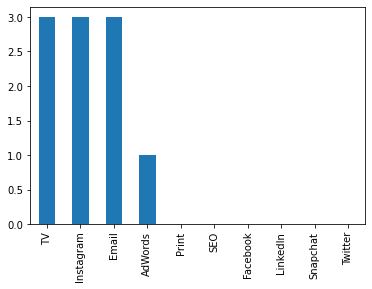

In [88]:
#Output of Gurobi
print('The optimal ROI value is '+ str(ojModel.objVal))

budget = list(ojModel.x)
budget_dict = {}
i=0
for word in mediums:
    budget_dict[word] = budget[i]
    i=i+1

print("\nMarketing budget allocation across given mediums in millions ")
print(pd.Series(budget_dict).sort_values(ascending=False))
pd.Series(budget_dict).sort_values(ascending=False).plot(kind = 'bar')

## Question 4

Formulate the marketing budget allocation problem using the Second ROI

In [89]:
# Consider second row of dataframe from column 1(drop platform column) for objective matrix
obj2 = np.array(ROI_data.iloc[1][1:])

# We don't need to construct contraints again as only ROI data(objective matrix) has changed.
# Optimize the problem using Gurobi
ojModel2 = gp.Model() # initialize an empty model

ojModX2 = ojModel2.addMVar(len(obj2)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon2 = ojModel2.addMConstrs(A, ojModX2, sense, B) # add the constraints to the model
ojModel2.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel2.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel2.Params.TimeLimit = 3600

ojModel2.optimize() # solve the LP

The optimal ROI value is 0.45600000000000007

Marketing budget allocation across given mediums in millions 
Print        3.0
Facebook     3.0
LinkedIn     3.0
AdWords      1.0
TV           0.0
SEO          0.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
Email        0.0
dtype: float64


<AxesSubplot:>

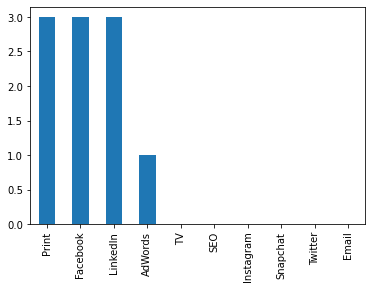

In [90]:
#Output of Gurobi
print('The optimal ROI value is '+ str(ojModel2.objVal))

budget2 = list(ojModel2.x)
budget_dict2 = {}
i=0
for word in mediums:
    budget_dict2[word] = budget2[i]
    i=i+1

print("\nMarketing budget allocation across given mediums in millions ")
print(pd.Series(budget_dict2).sort_values(ascending=False))
pd.Series(budget_dict2).sort_values(ascending=False).plot(kind = 'bar')

<AxesSubplot:>

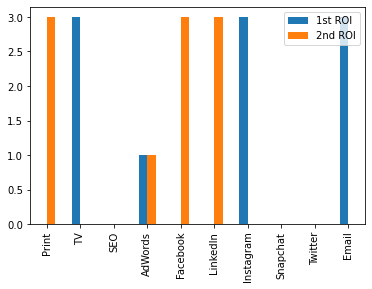

In [91]:
newdf=pd.DataFrame(index = mediums)

newdf["1st ROI"]=budget_dict.values()
newdf["2nd ROI"]=budget_dict2.values()
newdf.plot(kind='bar')

## Question 5
Are the allocations the same?  Assuming the first ROI data is correct, if you were to use the 
second allocation (the allocation that assumed the second ROI data was correct) how much 
lower would the objective be relative to the optimal objective (the one that uses the first ROI 
data and the first allocation)?  Assuming the second ROI data is correct, if you used the first 
allocation how much lower would the objective be relative to the optimal objective?  Do you 
think the third constraint above, based on your boss’ experience, is useful? 

In [92]:
#First ROI is correct and second allocation is used
ojModel.objVal - obj@ojModel2.x

0.20400000000000007

In [93]:
#Second ROI is correct and first allocation is used
ojModel2.objVal-obj2@ojModel.x

0.19200000000000006

In [94]:
# Remove the 3rd contraint to see if it's useful

# Left hand side of constraits.
A = np.zeros((3, len(obj))) #Initialize matrix with zeroes



#Total budget is of 10M
A[0, :] = 1 

#The amount invested in print and TV should be no more than the amount spent on Facebook and email
A[1, [medium_dict['Print'], medium_dict['TV']]] = 1 
A[1, [medium_dict['Facebook'], medium_dict['Email']]] = -1

#The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and 
#Twitter) should be at least twice of SEO and AdWords.

A[2, [medium_dict['SEO'], medium_dict['AdWords']]] = 2 
A[2, [medium_dict['Facebook'], medium_dict['LinkedIn'], medium_dict['Instagram'], medium_dict['Snapchat'], medium_dict['Twitter']]] = -1

#Right hand side of contraints

B = np.zeros(3)
B[0] = 10 ##Total budget is of 10M

#Sign of contraints we have contructed.
sense = np.array(['<']*3)


In [95]:
#Run the new model on ROI data 1
#Optimize the problem using Gurobi
ojModel3 = gp.Model() # initialize an empty model

ojModX3 = ojModel3.addMVar(len(obj)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon3 = ojModel3.addMConstrs(A, ojModX3, sense, B) # add the constraints to the model
ojModel3.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel3.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel3.Params.TimeLimit = 3600

ojModel3.optimize() # solve the LP

#Run the new model on ROI data 2
#Optimize the problem using Gurobi
ojModel4 = gp.Model() # initialize an empty model

ojModX4 = ojModel4.addMVar(len(obj2)) # tell the model how many variables there are
# must define the variables before adding constraints because variables go into the constraints
ojModCon4 = ojModel4.addMConstrs(A, ojModX4, sense, B) # add the constraints to the model
ojModel4.setMObjective(None,obj2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model...we'll talk about the None and the 0

ojModel4.Params.OutputFlag = 0 # tell gurobi to shut up!!
ojModel4.Params.TimeLimit = 3600

ojModel4.optimize() # solve the LP

The optimal ROI value is 0.46499999999999997

Marketing budget allocation across given mediums in millions 
TV           5.0
Email        5.0
Print        0.0
SEO          0.0
AdWords      0.0
Facebook     0.0
LinkedIn     0.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
dtype: float64


<AxesSubplot:>

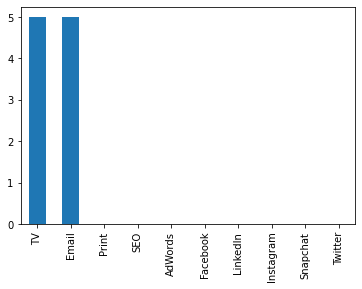

In [96]:
# Results of 2 new models
print('The optimal ROI value is '+ str(ojModel3.objVal))

budget3 = list(ojModel3.x)
budget_dict3 = {}
i=0
for word in mediums:
    budget_dict3[word] = budget3[i]
    i=i+1

print("\nMarketing budget allocation across given mediums in millions ")
print(pd.Series(budget_dict3).sort_values(ascending=False))
pd.Series(budget_dict3).sort_values(ascending=False).plot(kind = 'bar')





The optimal ROI value is 0.46499999999999997

Marketing budget allocation across given mediums in millions 
Print        5.0
Facebook     5.0
TV           0.0
SEO          0.0
AdWords      0.0
LinkedIn     0.0
Instagram    0.0
Snapchat     0.0
Twitter      0.0
Email        0.0
dtype: float64


<AxesSubplot:>

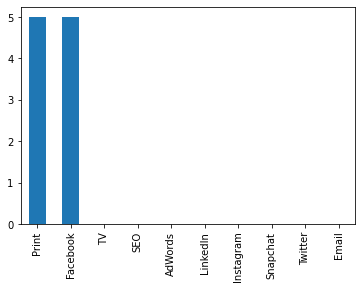

In [97]:
print('\nThe optimal ROI value is '+ str(ojModel4.objVal))

budget4 = list(ojModel4.x)
budget_dict4 = {}
i=0
for word in mediums:
    budget_dict4[word] = budget4[i]
    i=i+1

print("\nMarketing budget allocation across given mediums in millions ")
print(pd.Series(budget_dict4).sort_values(ascending=False))
pd.Series(budget_dict4).sort_values(ascending=False).plot(kind = 'bar')

Maximum profit returned is more without the constraint.  465000.0  USD

This is more than the ROI gained with the third constraint  456000.0  and  456000.0  by  9000.0  USD 
  
Summary : 

Profit is maximised without the constraint. However, As we can see the budget allocation for media spends is split in only in   two media. Adding a constraint maybe a method to avoid distributing budget in only two channels.

## Question 6
To explore this further perform some analysis of how your optimal allocation would change 
based on changes in the ROI data.  Use the first ROI data as your starting point.  By how much 
could each advertising medium’s ROI increase or decrease and still result in the same optimal 
allocation you found in step (3)? 

In [98]:
# how our optimal allocation would change 
#based on changes in the ROI data

# We have 13 constraints hence we will get 13 values
print([con.Pi for con in ojModCon])


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006999999999999999, 0.0, 0.0, 0.015, 0.039, 0.010000000000000002, 0.0]


Here, equaltion 7,10,11,12 have non shadow costs/Dual variables. Hence, these equations are binding constraints. Remaining constraints are non-binding constraints.


In [99]:
#By how much could each advertising medium’s ROI increase or decrease and 
#still result in the same optimal allocation you found in step (3)

print("The lowest values of variables are given below")
print(ojModX.SAObjLow)
print("The highest values of variables are given below")
print(ojModX.SAObjUp)

The lowest values of variables are given below
[ -inf 0.039  -inf 0.033  -inf  -inf 0.039  -inf  -inf 0.029]
The highest values of variables are given below
[0.049 0.062 0.039 0.046 0.029 0.039   inf 0.039 0.039   inf]


In [100]:
# create an Empty DataFrame object
df = pd.DataFrame()

df["platform"]=mediums
df["Minimum"]=ojModX.SAObjLow
df["Maximum"]=ojModX.SAObjUp
df["current value"]=obj
#The amount by which we can increase the ROI from the current value= Maximum-current
df["Allowed increase"]=df["Maximum"]-df["current value"]
#The amount by which we can decrease the ROI from the current value= current-Minimum
df["Allowed decrease"]=df["current value"]-df["Minimum"]

#Let's replace -inf with 0 and +inf with 0.1 to interpret our results in the better way.

df["Minimum"]=df["Minimum"].replace(float('-inf'), 0)
df["Maximum"]=df["Maximum"].replace(float('-inf'), 0)
df["Minimum"]=df["Minimum"].replace(float('inf'), 0.1)
df["Maximum"]=df["Maximum"].replace(float('inf'), 0.1)
df["Allowed increase"]=df["Allowed increase"].replace(float('-inf'), 0)
df["Allowed decrease"]=df["Allowed decrease"].replace(float('-inf'), 0)
df["Allowed increase"]=df["Allowed increase"].replace(float('inf'), 0.1)
df["Allowed decrease"]=df["Allowed decrease"].replace(float('inf'), 0.1)
df=df.set_index('platform')
df

,Minimum,Maximum,current value,Allowed increase,Allowed decrease
platform,,,,,
Print,0.000,0.049,0.031,0.018,0.100
TV,0.039,0.062,0.049,0.013,0.010
SEO,0.000,0.039,0.024,0.015,0.100
AdWords,0.033,0.046,0.039,0.007,0.006
Facebook,0.000,0.029,0.016,0.013,0.100
LinkedIn,0.000,0.039,0.024,0.015,0.100
Instagram,0.039,0.100,0.046,0.100,0.007
Snapchat,0.000,0.039,0.026,0.013,0.100
Twitter,0.000,0.039,0.033,0.006,0.100


## Question 7

Your boss has gained permission to reinvest half of the return. For example, if the marketing 
obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% = 
$10.2M.  The monthly ROI for next year is given in Project1.Rdata. The three constraints given 
by your boss are still in place for each month.  What is the optimal allocation for each month? 

In [101]:
# Question 7 - with 1st ROI
# Inital condition
obj3 = np.array(ROI_data.iloc[0][1:])
budget = 10

# Consider first row of dataframe from column 1(drop platform column) for objective matrix
obj = np.array(ROI_data.iloc[0][1:])

# Left hand side of constraits.
A = np.zeros((len(obj)+3, len(obj))) #Initialize matrix with zeroes

# Each medium is budgeted for amount less than or equal to 3M. 
A[0:len(obj), 0:len(obj)] = np.identity(len(obj)) 

#Total budget is of 10M
A[len(obj), :] = 1 

#The amount invested in print and TV should be no more than the amount spent on Facebook and email
A[len(obj)+1, [medium_dict['Print'], medium_dict['TV']]] = 1 
A[len(obj)+1, [medium_dict['Facebook'], medium_dict['Email']]] = -1

#The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and 
#Twitter) should be at least twice of SEO and AdWords.

A[len(obj)+2, [medium_dict['SEO'], medium_dict['AdWords']]] = 2 
A[len(obj)+2, [medium_dict['Facebook'], medium_dict['LinkedIn'], medium_dict['Instagram'], medium_dict['Snapchat'], medium_dict['Twitter']]] = -1



#Sign of contraints we have contructed.
sense = np.array(['<']*(len(obj)+3))

value1=[]
monthly_allocation = {}
for i in roi_mat.index:
    
    # Right hand side
    B = np.zeros(len(obj3)+3)
    B[:len(obj3)] = 3
    B[len(obj3)] = budget

 

    # Use gurobi to optimize the solution
    AdvMod4 = gp.Model()
    Adv_x4 = AdvMod4.addMVar(len(obj3)) 
    AdvModCon4 = AdvMod4.addMConstrs(A, Adv_x4, sense, B)
    AdvMod4.setMObjective(None,obj3,0,sense=gp.GRB.MAXIMIZE) 
    AdvMod4.Params.OutputFlag = 0
    AdvMod4.optimize()
    
    profit = Adv_x4.x @ np.array(roi_mat.loc[i][0:]) / 100
    budget += profit*0.5
    value1.append(AdvMod4.objVal)
    monthly_allocation[i] = Adv_x4.x

ROI_monthly1 = pd.DataFrame(monthly_allocation).T
ROI_monthly1.set_axis(mediums, axis=1, inplace=True)
ROI_monthly1['Total'] = ROI_monthly1.sum(axis = 1)
ROI_monthly1

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total
January,0.0,3.0,0.0,1.000000,0.0,0.0,3.0,0.0,0.000000,3.0,10.000000
February,0.0,3.0,0.0,1.180000,0.0,0.0,3.0,0.0,0.000000,3.0,10.180000
March,0.0,3.0,0.0,1.353920,0.0,0.0,3.0,0.0,0.000000,3.0,10.353920
April,0.0,3.0,0.0,1.505381,0.0,0.0,3.0,0.0,0.010763,3.0,10.516144
May,0.0,3.0,0.0,1.564986,0.0,0.0,3.0,0.0,0.129971,3.0,10.694957
June,0.0,3.0,0.0,1.629829,0.0,0.0,3.0,0.0,0.259657,3.0,10.889486
July,0.0,3.0,0.0,1.699709,0.0,0.0,3.0,0.0,0.399418,3.0,11.099126
August,0.0,3.0,0.0,1.773336,0.0,0.0,3.0,0.0,0.546672,3.0,11.320008
September,0.0,3.0,0.0,1.845758,0.0,0.0,3.0,0.0,0.691517,3.0,11.537275
October,0.0,3.0,0.0,1.908289,0.0,0.0,3.0,0.0,0.816578,3.0,11.724866


In [102]:
# Question 7 - with 1st ROI
# Inital condition
obj3 = np.array(ROI_data.iloc[1][1:])
budget = 10

# Consider first row of dataframe from column 1(drop platform column) for objective matrix
obj = np.array(ROI_data.iloc[0][1:])

# Left hand side of constraits.
A = np.zeros((len(obj)+3, len(obj))) #Initialize matrix with zeroes

# Each medium is budgeted for amount less than or equal to 3M. 
A[0:len(obj), 0:len(obj)] = np.identity(len(obj)) 

#Total budget is of 10M
A[len(obj), :] = 1 

#The amount invested in print and TV should be no more than the amount spent on Facebook and email
A[len(obj)+1, [medium_dict['Print'], medium_dict['TV']]] = 1 
A[len(obj)+1, [medium_dict['Facebook'], medium_dict['Email']]] = -1

#The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and 
#Twitter) should be at least twice of SEO and AdWords.

A[len(obj)+2, [medium_dict['SEO'], medium_dict['AdWords']]] = 2 
A[len(obj)+2, [medium_dict['Facebook'], medium_dict['LinkedIn'], medium_dict['Instagram'], medium_dict['Snapchat'], medium_dict['Twitter']]] = -1



#Sign of contraints we have contructed.
sense = np.array(['<']*(len(obj)+3))

value=[]
monthly_allocation = {}
for i in roi_mat.index:
    
    # Right hand side
    B = np.zeros(len(obj3)+3)
    B[:len(obj3)] = 3
    B[len(obj3)] = budget

 

    # Use gurobi to optimize the solution
    AdvMod4 = gp.Model()
    Adv_x4 = AdvMod4.addMVar(len(obj3)) 
    AdvModCon4 = AdvMod4.addMConstrs(A, Adv_x4, sense, B)
    AdvMod4.setMObjective(None,obj3,0,sense=gp.GRB.MAXIMIZE) 
    AdvMod4.Params.OutputFlag = 0
    AdvMod4.optimize()
    
    profit = Adv_x4.x @ np.array(roi_mat.loc[i][0:]) / 100
    budget += profit*0.5
    value.append(AdvMod4.objVal)
    monthly_allocation[i] = Adv_x4.x

ROI_monthly = pd.DataFrame(monthly_allocation).T
ROI_monthly.set_axis(mediums, axis=1, inplace=True)
ROI_monthly['Total'] = ROI_monthly.sum(axis = 1)
ROI_monthly

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total
January,3.0,0.0,0.0,1.000000,3.0,3.0,0.0,0.0,0.000000,0.0,10.000000
February,3.0,0.0,0.0,1.177000,3.0,3.0,0.0,0.0,0.000000,0.0,10.177000
March,3.0,0.0,0.0,1.371863,3.0,3.0,0.0,0.0,0.000000,0.0,10.371863
April,3.0,0.0,0.0,1.547928,3.0,3.0,0.0,0.0,0.000000,0.0,10.547928
May,3.0,0.0,0.0,1.731983,3.0,3.0,0.0,0.0,0.000000,0.0,10.731983
June,3.0,0.0,0.0,1.894927,3.0,3.0,0.0,0.0,0.000000,0.0,10.894927
July,3.0,0.0,0.0,2.083140,3.0,3.0,0.0,0.0,0.000000,0.0,11.083140
August,3.0,0.0,0.0,2.301469,3.0,3.0,0.0,0.0,0.000000,0.0,11.301469
September,3.0,0.0,0.0,2.498300,3.0,3.0,0.0,0.0,0.000000,0.0,11.498300
October,3.0,0.0,0.0,2.711265,3.0,3.0,0.0,0.0,0.000000,0.0,11.711265


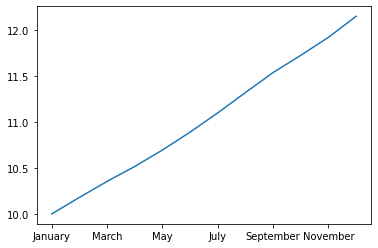

In [103]:
import matplotlib.pyplot as plt
ROI_monthly1["Total"].plot()
plt.show()


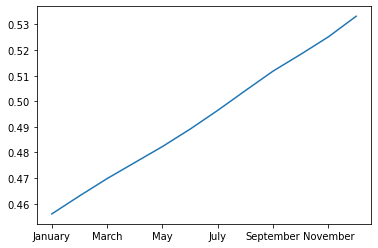

In [104]:
ROI_monthly1['optimal  value'] = value1
ROI_monthly1['optimal  value'].plot()
plt.show()

<AxesSubplot:>

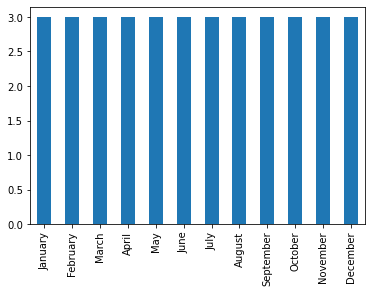

In [105]:
ROI_monthly1["TV"].plot(kind='bar')

<AxesSubplot:>

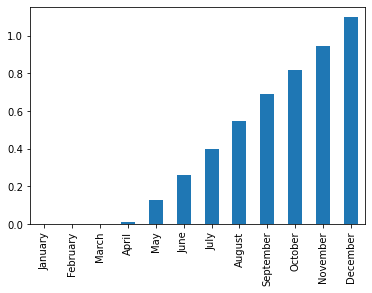

In [106]:
ROI_monthly1["Twitter"].plot(kind='bar')

<AxesSubplot:>

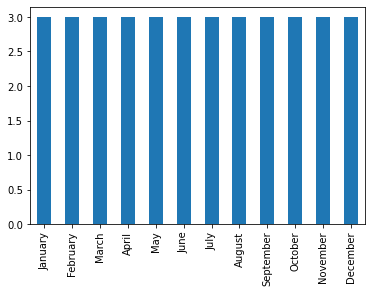

In [107]:
ROI_monthly1["Instagram"].plot(kind='bar')

<AxesSubplot:>

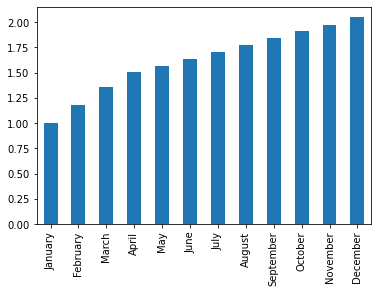

In [108]:
ROI_monthly1["AdWords"].plot(kind='bar')

## Question 8
A stable budget is defined as a monthly allocation such that for each platform the monthly 
change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not 
need to solve a new optimization model.  Describe how my might model this? 

In [109]:
#first_ROI_monthly=first_ROI_monthly.drop('Total')
#first_ROI_monthly=first_ROI_monthly.drop('Optimum ROI value')
ROI_monthly1.diff()

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Total,optimal value
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,0.0,0.0,0.0,0.180000,0.0,0.0,0.0,0.0,0.000000,0.0,0.180000,0.007020
March,0.0,0.0,0.0,0.173920,0.0,0.0,0.0,0.0,0.000000,0.0,0.173920,0.006783
April,0.0,0.0,0.0,0.151461,0.0,0.0,0.0,0.0,0.010763,0.0,0.162224,0.006262
May,0.0,0.0,0.0,0.059604,0.0,0.0,0.0,0.0,0.119208,0.0,0.178812,0.006258
June,0.0,0.0,0.0,0.064843,0.0,0.0,0.0,0.0,0.129686,0.0,0.194529,0.006809
July,0.0,0.0,0.0,0.069880,0.0,0.0,0.0,0.0,0.139760,0.0,0.209641,0.007337
August,0.0,0.0,0.0,0.073627,0.0,0.0,0.0,0.0,0.147255,0.0,0.220882,0.007731
September,0.0,0.0,0.0,0.072422,0.0,0.0,0.0,0.0,0.144845,0.0,0.217267,0.007604
October,0.0,0.0,0.0,0.062530,0.0,0.0,0.0,0.0,0.125061,0.0,0.187591,0.006566


From the table we can see that for each platform the monthly change in spend is no more than $1M. Hence, allocation we found is stable.